In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Getting familiar

In [53]:
df = pd.read_csv('../../datasets/netflix_titles.csv')
df.shape

(8807, 12)

In [3]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5183,s5184,Movie,Mubarakan,Anees Bazmee,"Anil Kapoor, Arjun Kapoor, Ileana D'Cruz, Athi...",India,"November 5, 2017",2017,PG-13,153 min,"Comedies, Dramas, International Movies",Chaos ensues after two orphaned twin brothers ...
365,s366,Movie,Eyes of a Thief,Najwa Najjar,"Khaled Abol El Naga, Souad Massi, Suhail Hadda...",", France, Algeria","July 30, 2021",2014,TV-14,103 min,"Dramas, Independent Movies, International Movies","After a decade in prison, a Palestinian man wi..."
5368,s5369,Movie,The Incredible Jessica James,Jim Strouse,"Jessica Williams, Chris O'Dowd, Lakeith Stanfi...",United States,"July 28, 2017",2017,TV-MA,84 min,"Comedies, Independent Movies, Romantic Movies","Burned by a bad breakup, a struggling New York..."
7273,s7274,Movie,Le serment des Hitler,Emmanuel Amara,NaN,France,"May 1, 2019",2014,TV-PG,54 min,"Documentaries, International Movies",This documentary retraces the footsteps of Ado...
5643,s5644,Movie,LEGO: Marvel Super Heroes: Maximum Overload,Greg Richardson,"Troy Baker, Drake Bell, Fred Tatasciore, Dee B...",United States,"January 6, 2017",2013,TV-Y7,22 min,Children & Family Movies,Villainous Loki is amassing an army to conquer...


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
# shows value count
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [6]:
# shows na count
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
df2 = df[df['release_year']>2020]
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [19]:
df3 = df[df['title']=='Midnight Mass']
df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [20]:
df['release_year'].isin([2000,2010]).sum()

231

# Peek at missing data

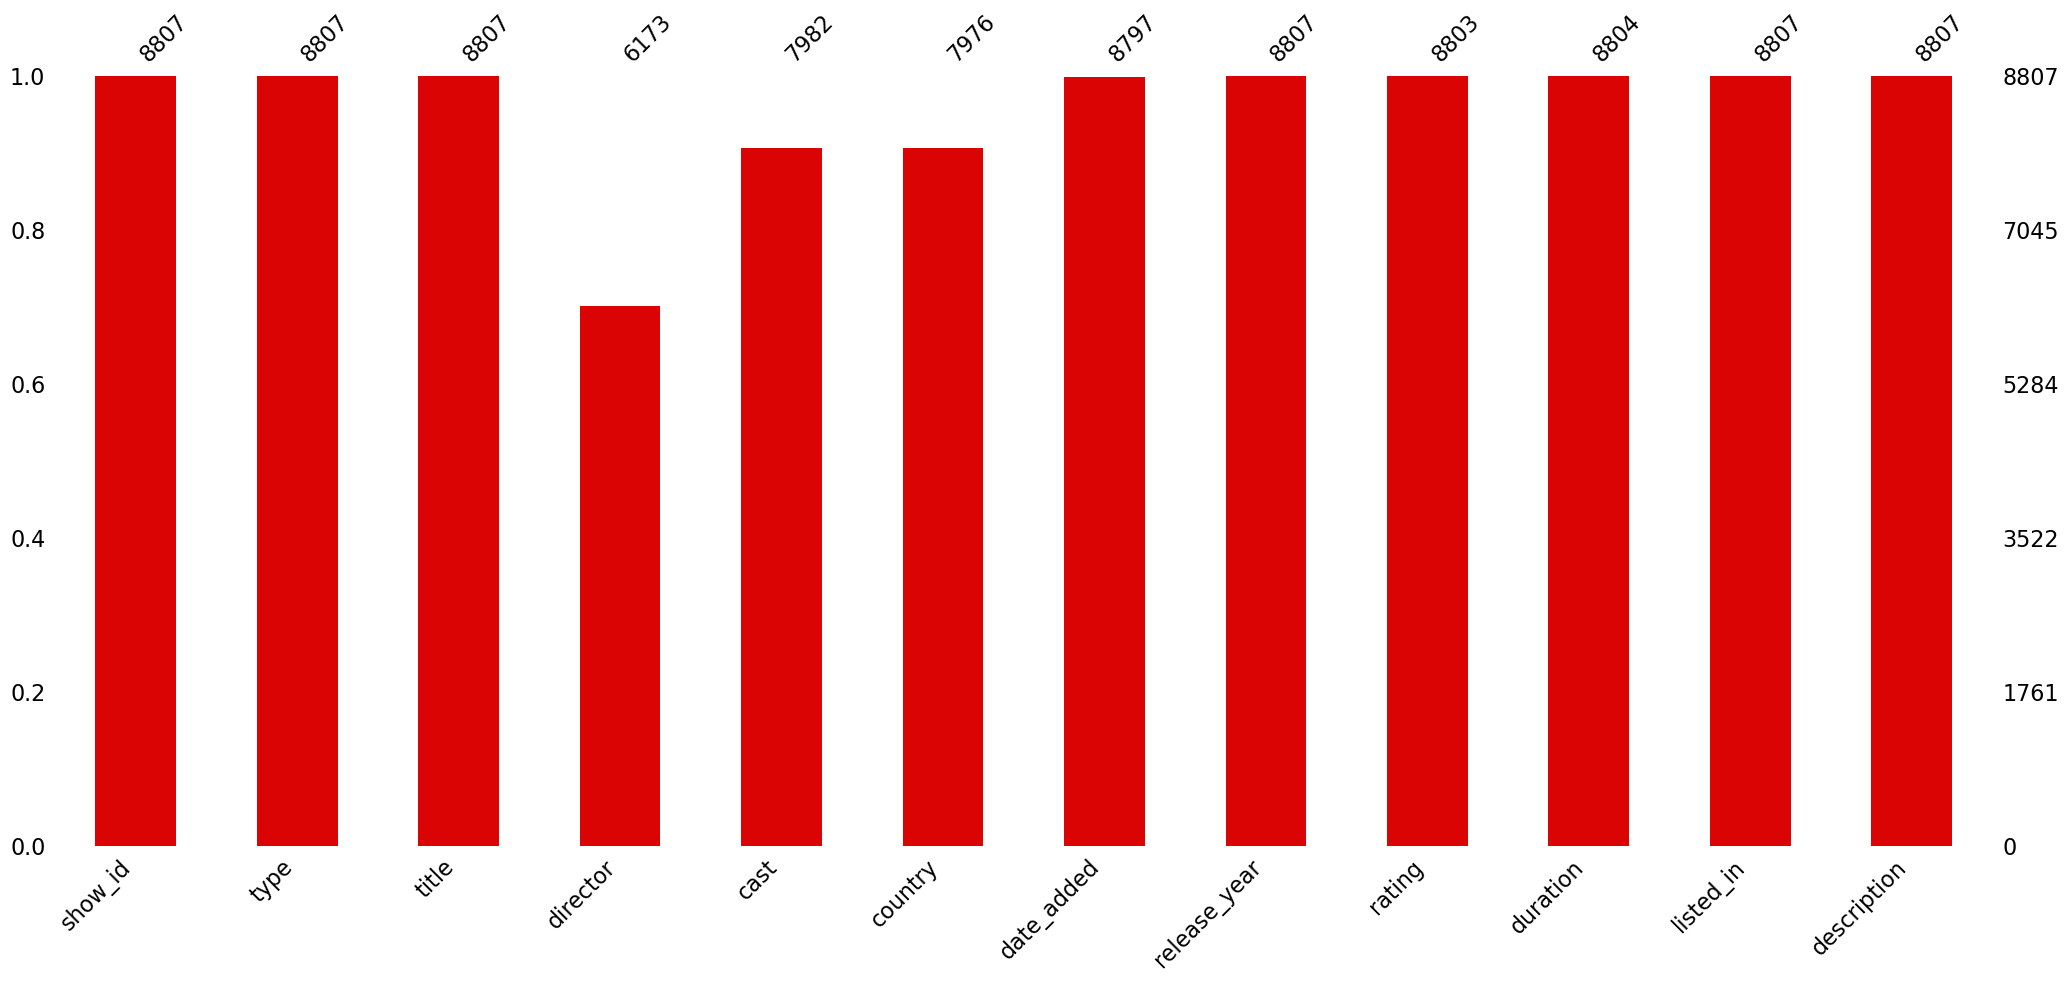

In [8]:
# Highlighting the number of missing value in bar chart
msno.bar(df, color='#DB0404')
plt.show()

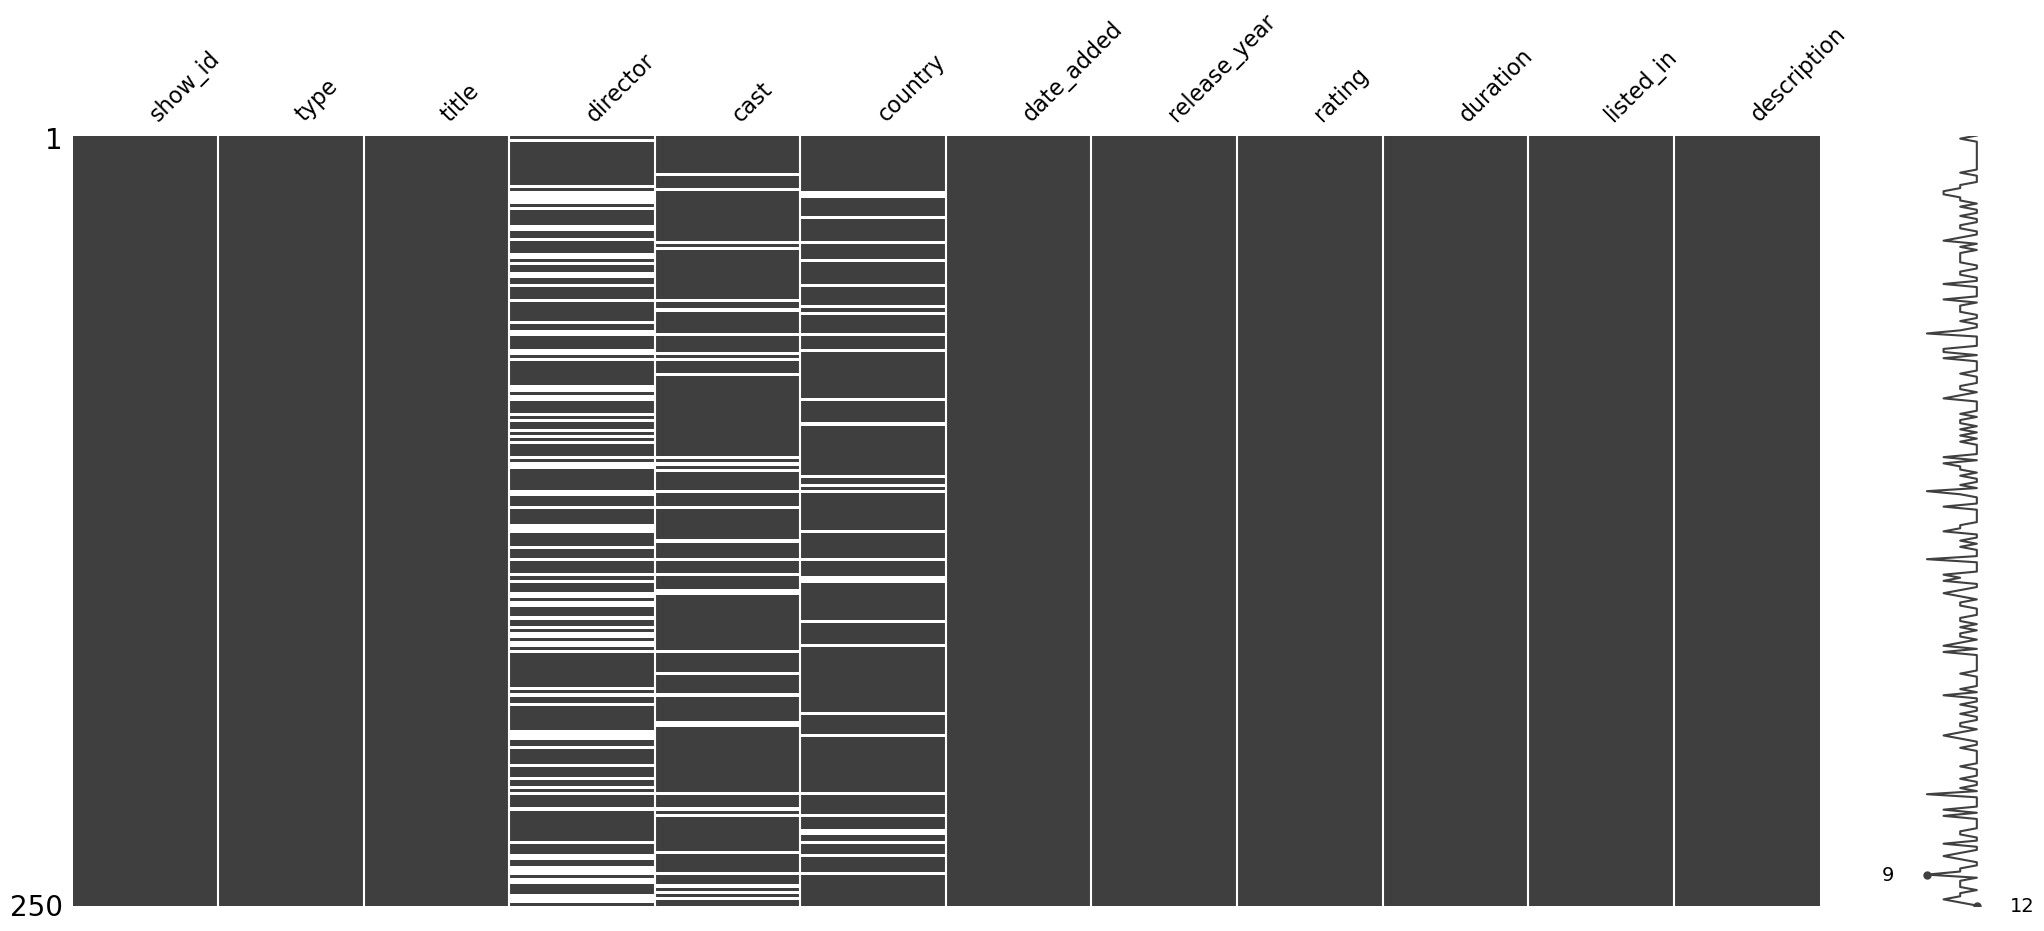

In [7]:
# highlighting the missing value in matrix chart
msno.matrix(df.sample(250))
plt.show()

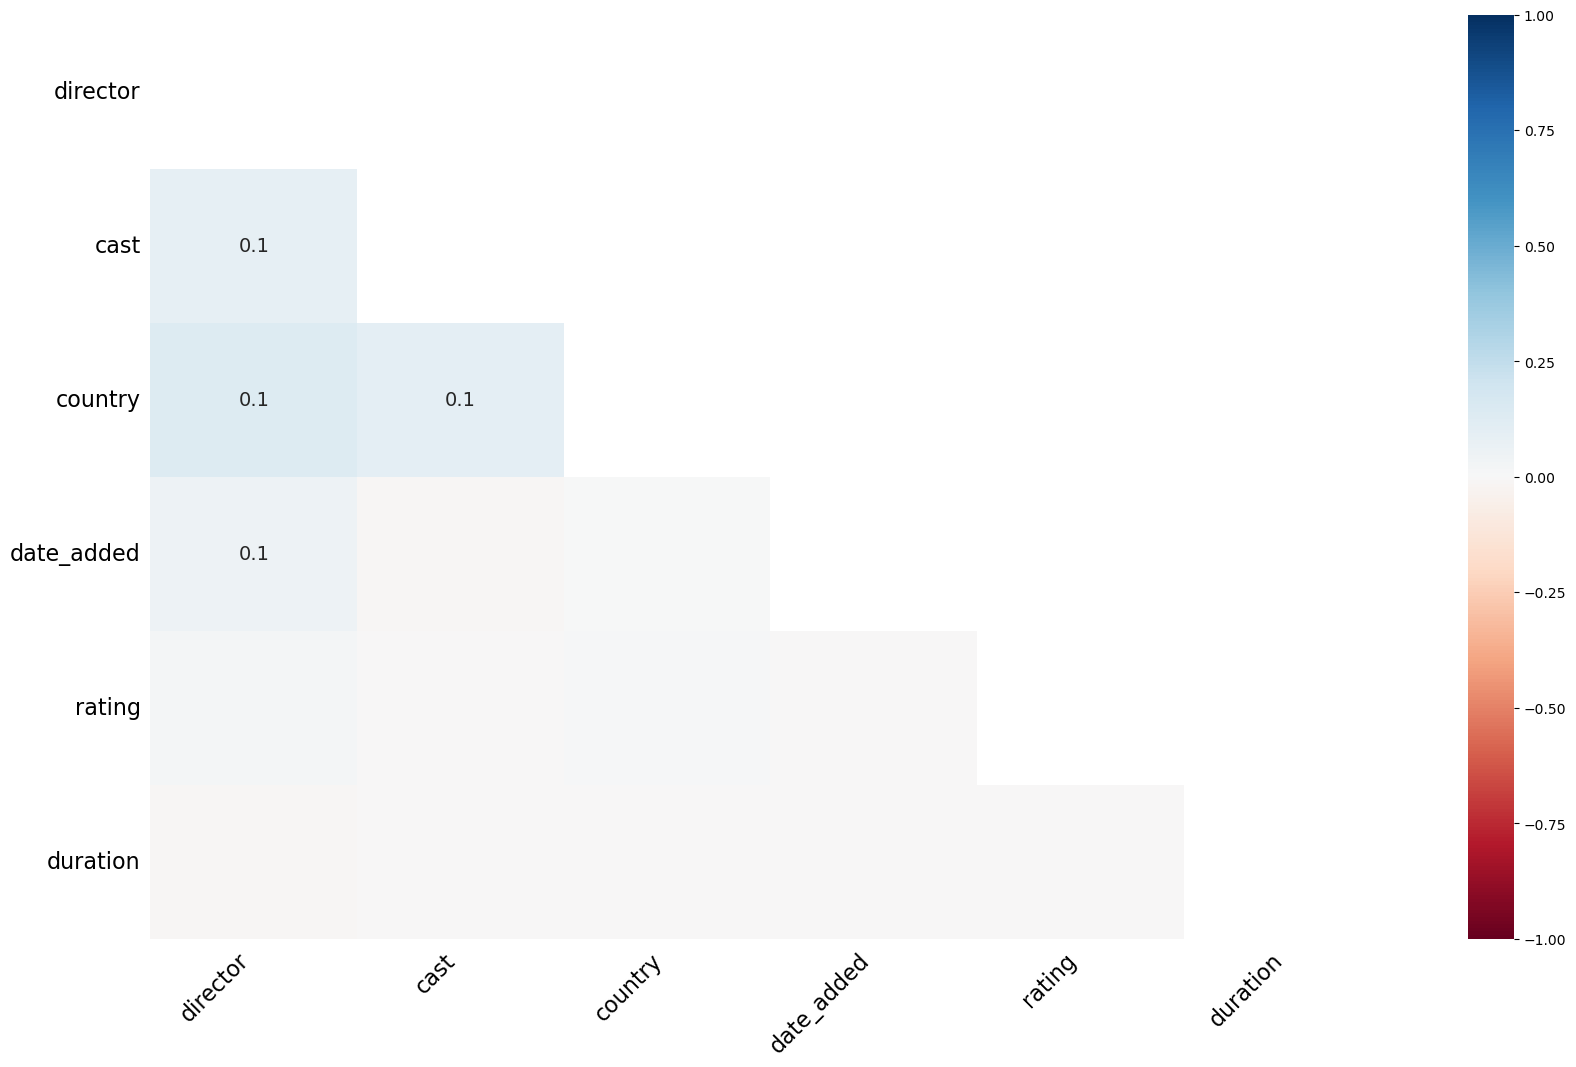

In [9]:
# 🔥 Visualize the correlation of missing values across columns with a heatmap! 📊
msno.heatmap(df)
plt.show()

# Shows vs Movies

In [10]:
df.groupby('type').show_id.count()

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [11]:
df['type'].value_counts().sort_values()

type
TV Show    2676
Movie      6131
Name: count, dtype: int64

In [12]:
# series
net_shows = df[df['type']== 'TV Show']
# movies
net_movies = df[df['type'] == 'Movie']

In [50]:
plt.style.use('fast')
no_tv_movie = df['type'].value_counts().sort_values()
# Pie chart for type columns
import plotly.graph_objects as go
label = ["TV-Shows",
         "Movies"]
colors = ['#1A0D0D','#DB0404']
fig = go.Figure(data=[go.Pie(values=no_tv_movie, labels=label,  hole=.06)])
fig.update_layout(title_text='Type of Netflix Content')
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value',
                  textfont_size=30,
                  marker=dict(colors=colors,
                              line=dict(color='#7B7C7C', width=3)))
fig.show()

# Movie Ratings

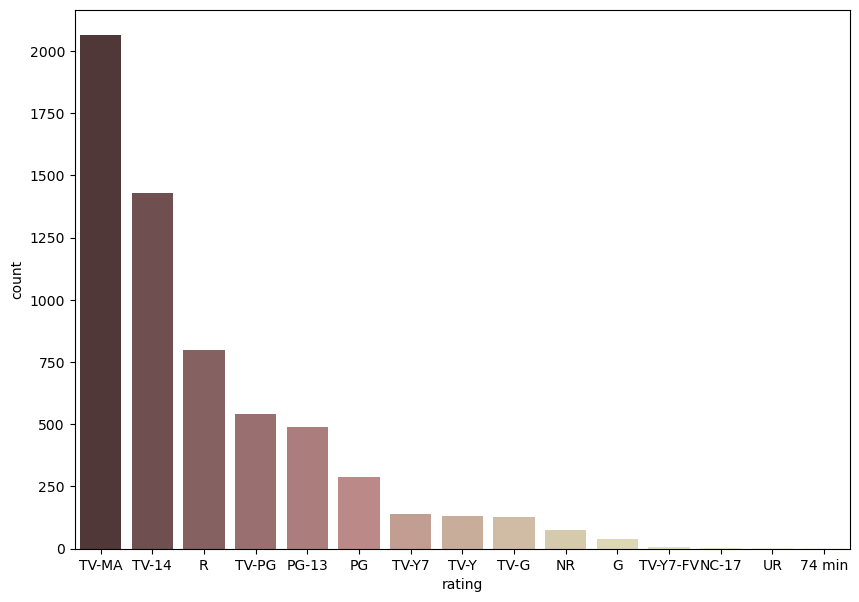

In [14]:
# movies rating anaysis
plt.figure(figsize=(10,7))
sns.countplot(x='rating', data=net_movies, order= net_movies['rating'].value_counts().index[0:15], palette='pink')
plt.show()

In [21]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

# Contents Update

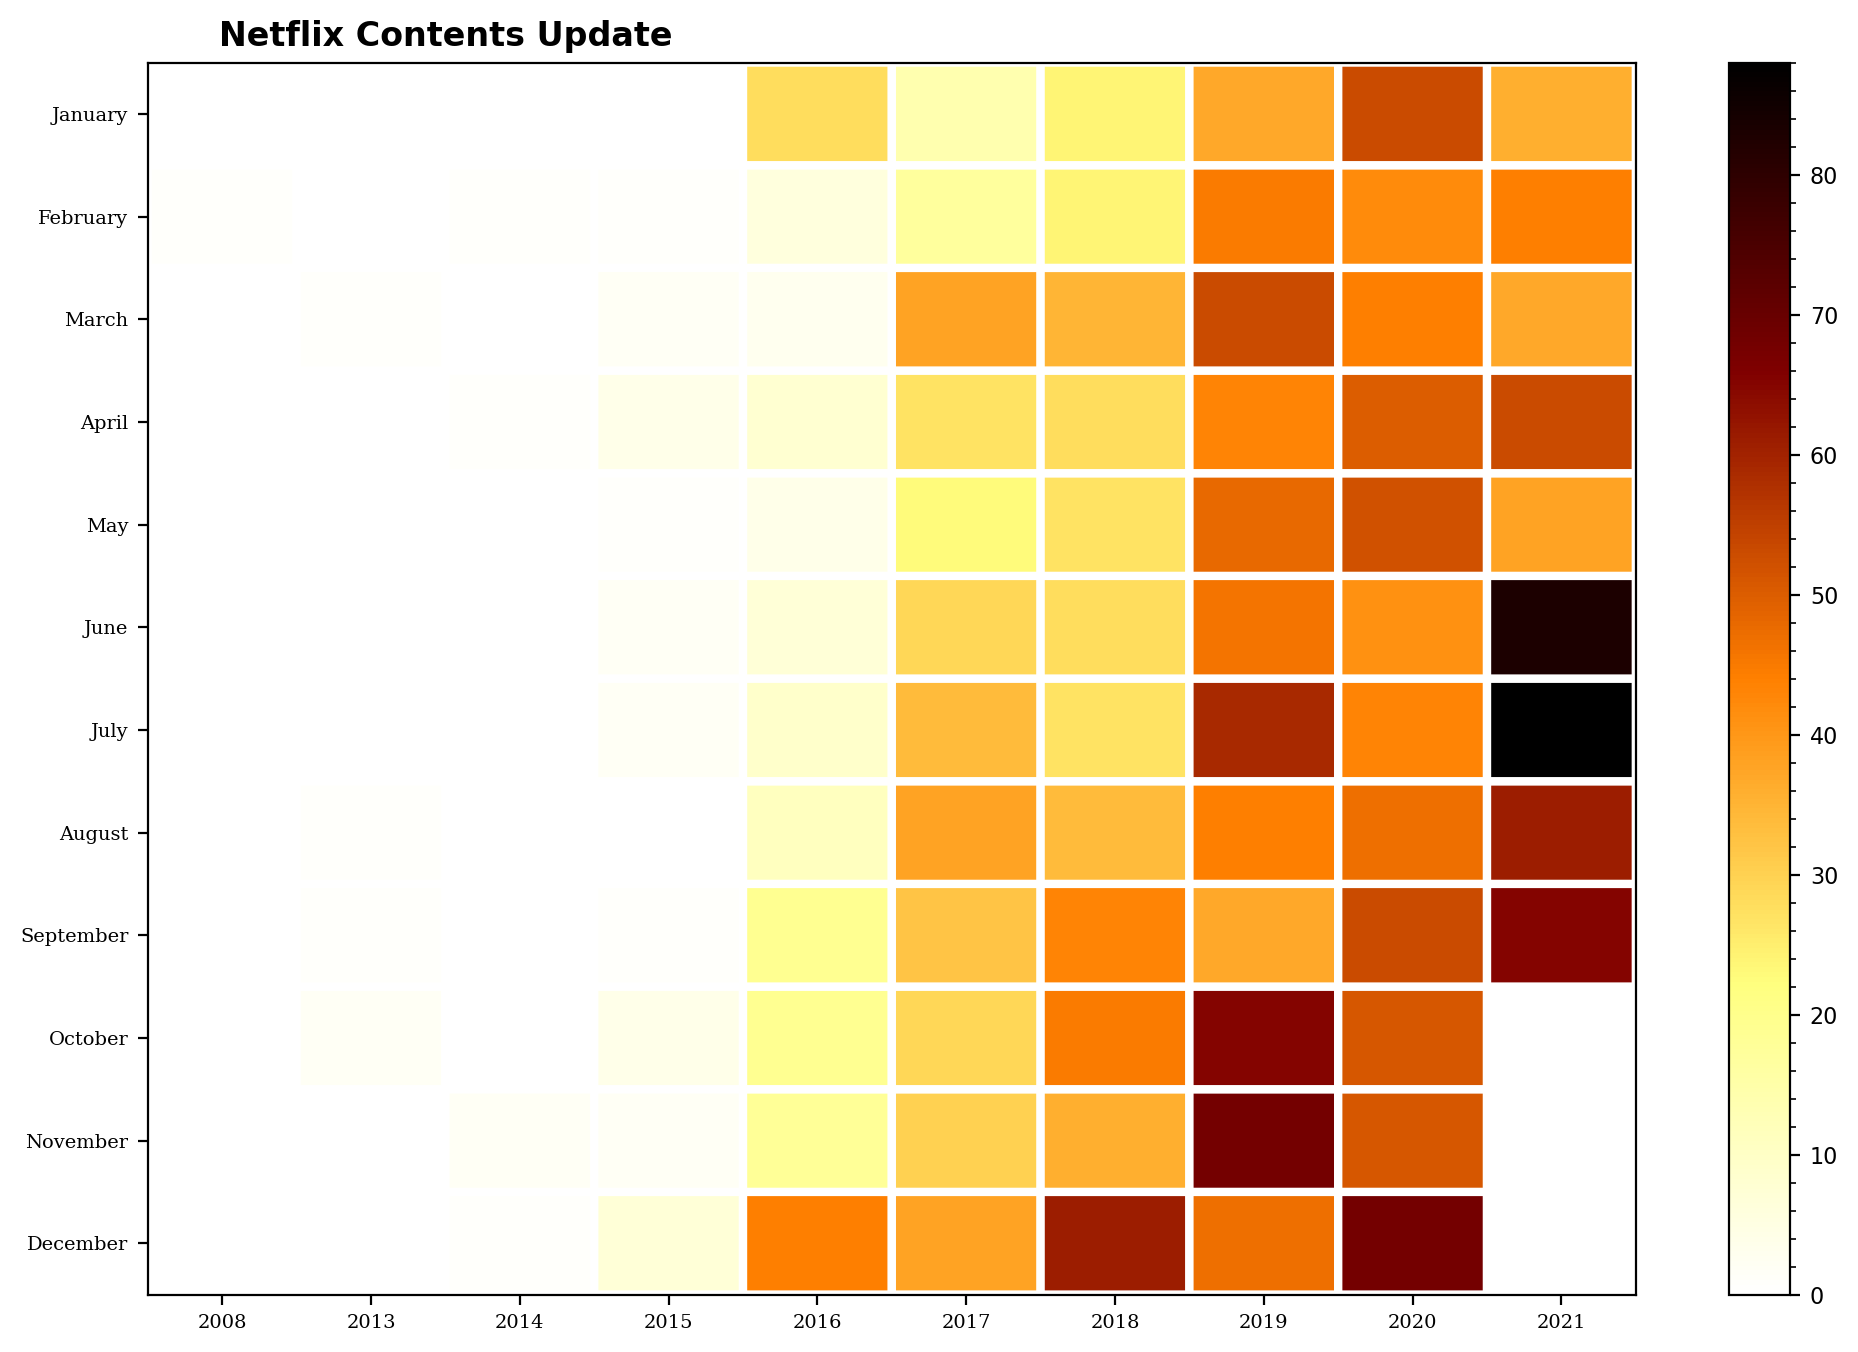

In [16]:
net_date = net_shows[['date_added']].dropna()
net_date['year'] = net_date['date_added'].apply(lambda x: x.split(', ')[-1])
net_date['month'] = net_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0]) # left strip

month_order = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December'][::-1]
nf = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(12,8), dpi=200)
#heatmap
plt.pcolor(nf, cmap='afmhot_r',edgecolor='white',linewidths=3)
plt.xticks(np.arange(0.5, len(nf.columns),1), nf.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(nf.index),1), nf.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update', fontsize=12, fontweight='bold',position=(0.20,1.0+0.2))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

In [17]:
nf['2019'].nsmallest(5)

month
September    37.0
January      37.0
April        43.0
August       44.0
February     45.0
Name: 2019, dtype: float64

# Reviews Analysis

In [22]:
imdb_rating = pd.read_csv('../../datasets/IMDB-Ratings.csv', usecols=['averageRating'])
imdb_title = pd.read_csv('../../datasets/imdb-top-10000-movies.csv', usecols=['title','year','genre'])

In [23]:
ratings = pd.DataFrame({'Title':imdb_title.title,
'Release Year':imdb_title.year, 'Rating':imdb_rating.averageRating, 'Genre':imdb_title.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(9940, 4)

In [24]:
ratings.dropna()
join_tab = ratings.merge(net_movies, left_on='Title', right_on='title', how='inner')
join_tab = join_tab.sort_values(by='Rating', ascending=False)
# checking after joining
join_tab.sample()

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
990,Best of the Best,1989,7.3,"Action, Drama, Sport",s929,Movie,Best of the Best,Robert Radler,"Eric Roberts, James Earl Jones, Sally Kirkland...",United States,"May 1, 2021",1989,PG-13,97 min,"Action & Adventure, Sports Movies",Personal problems and racial tensions distract...


In [25]:
join_tab.head()

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1323,Escape from Planet Earth,2012,9.2,"Animation, Adventure, Comedy",s1102,Movie,Escape from Planet Earth,Cal Brunker,"Rob Corddry, Brendan Fraser, Sarah Jessica Par...","United States, Canada","April 3, 2021",2013,PG,89 min,"Children & Family Movies, Comedies, Sci-Fi & F...",This all-ages animated comedy follows the adve...
1401,The Night Clerk,2020,8.7,"Crime, Drama, Mystery",s2417,Movie,The Night Clerk,Michael Cristofer,"Tye Sheridan, Ana de Armas, Helen Hunt, John L...",United States,"June 6, 2020",2020,R,90 min,"Dramas, Independent Movies","After a charming guest checks in, a voyeuristi..."
366,Sweeney Todd: The Demon Barber of Fleet Street,2007,8.7,"Drama, Horror, Musical",s8139,Movie,Sweeney Todd: The Demon Barber of Fleet Street,Tim Burton,"Johnny Depp, Helena Bonham Carter, Alan Rickma...","United States, United Kingdom","January 1, 2020",2007,R,116 min,"Dramas, Horror Movies, Music & Musicals","After being falsely imprisoned, a vengeful mur..."
1543,The Final Destination,2009,8.6,"Horror, Thriller",s8299,Movie,The Final Destination,David R. Ellis,"Bobby Campo, Shantel VanSanten, Nick Zano, Hal...",United States,"January 1, 2020",2009,R,82 min,Horror Movies,Nick O'Bannon thinks he's cheated death when h...
1483,The Green Inferno,2013,8.5,"Adventure, Horror",s3263,Movie,The Green Inferno,Eli Roth,"Ignacia Allamand, Daryl Sabara, Nicolás Martín...","United States, Chile","November 16, 2019",2013,R,101 min,"Horror Movies, Independent Movies",Determined to save an Amazon tribe being squee...


In [27]:
import plotly.express as go
top_rated = join_tab[0:10]
fig = go.sunburst(top_rated,path=['title','country'],values='Rating', color='Rating')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

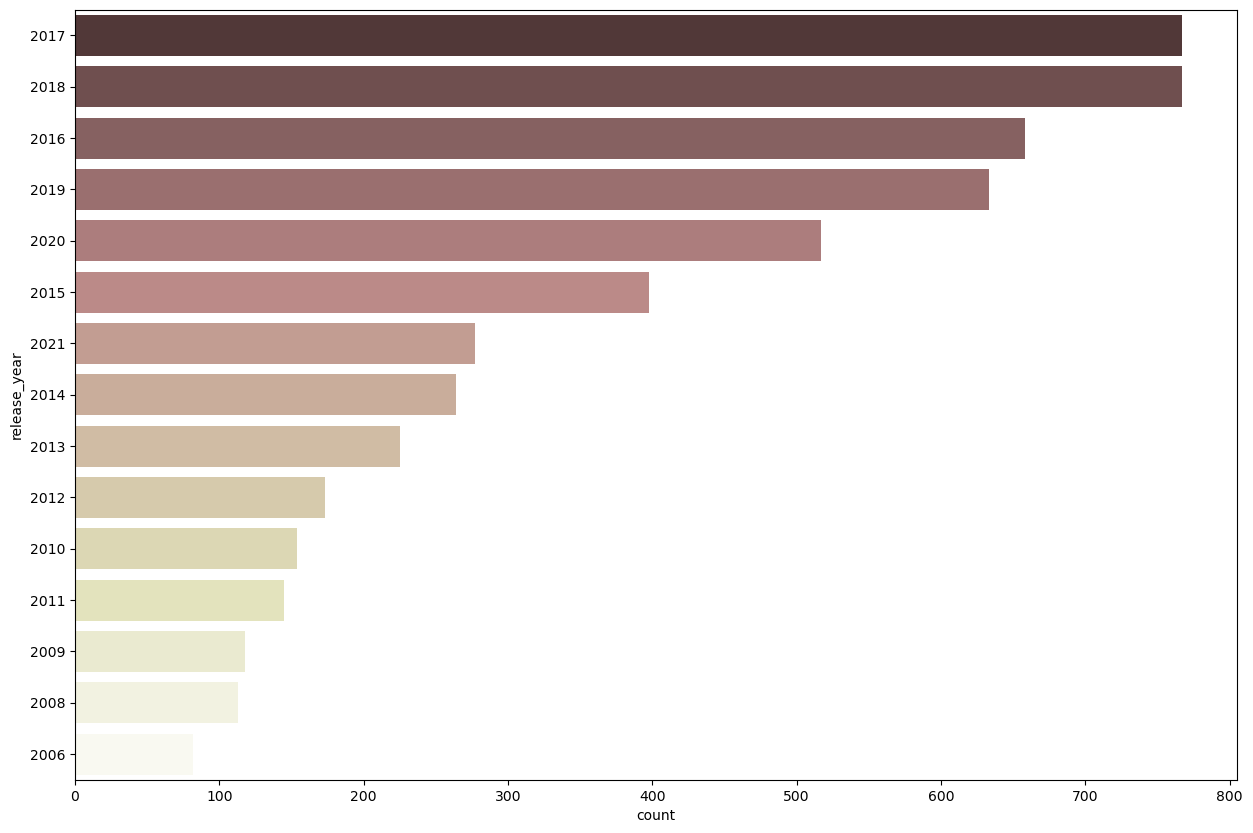

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data=net_movies, y='release_year',palette='pink', order=net_movies['release_year'].value_counts().index[0:15])
plt.show()

# Country Analysis

In [28]:
top_country = join_tab['country'].value_counts().sort_values(ascending=False)
top_country = pd.DataFrame(top_country)
country_count = top_country[0:11]
country_count

,count
country,
United States,720
India,165
"United Kingdom, United States",53
United Kingdom,34
"United States, Canada",30
"United States, United Kingdom",25
"United States, Germany",18
Canada,16
"Canada, United States",14


In [30]:
countries = {}
net_movies['country'] = net_movies['country'].fillna('Unknown')
xou = list(net_movies['country'])

for i in xou:
    i= list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] +=1
            else:
                countries[j] =1

In [31]:
countries_fin = {}
for country,no in countries.items():
    country = country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse=True)}

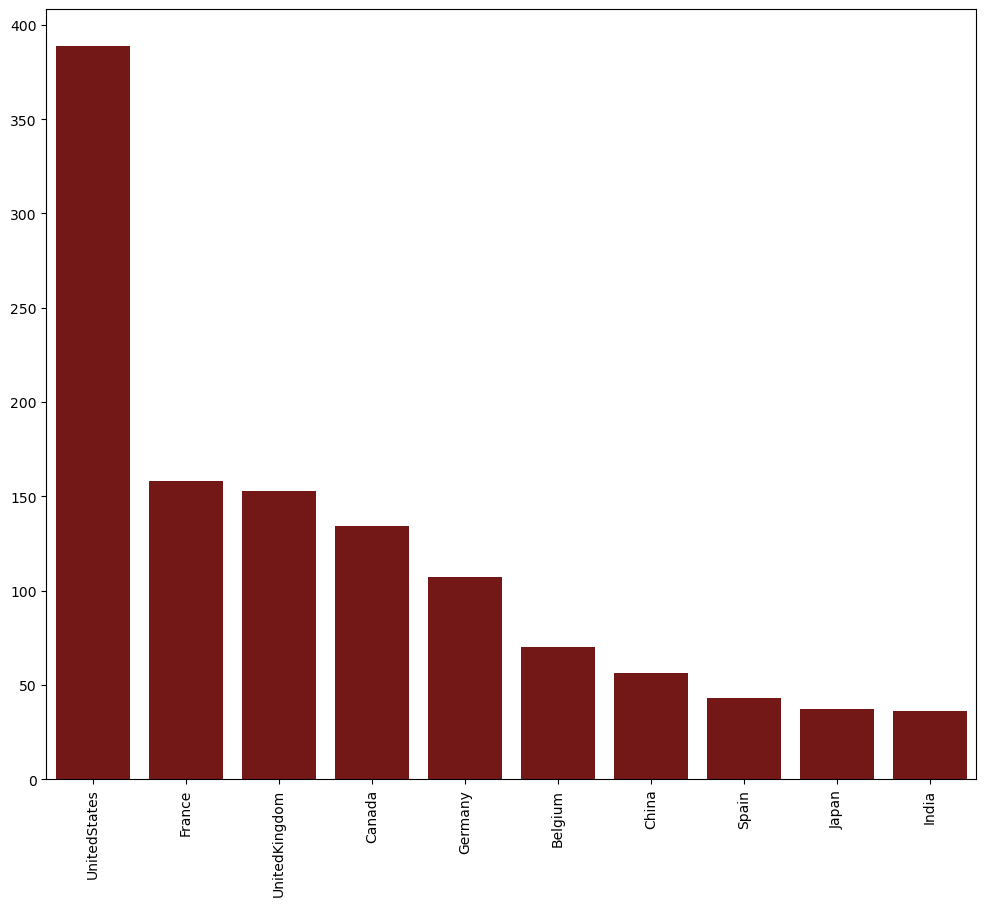

In [32]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10], color='#830908')
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)
plt.show()

In [33]:
len(countries_fin)

119

In [42]:
countries1={}
net_shows['country']=net_shows['country'].fillna('Unknown')
cou1=list(net_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [43]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no

countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

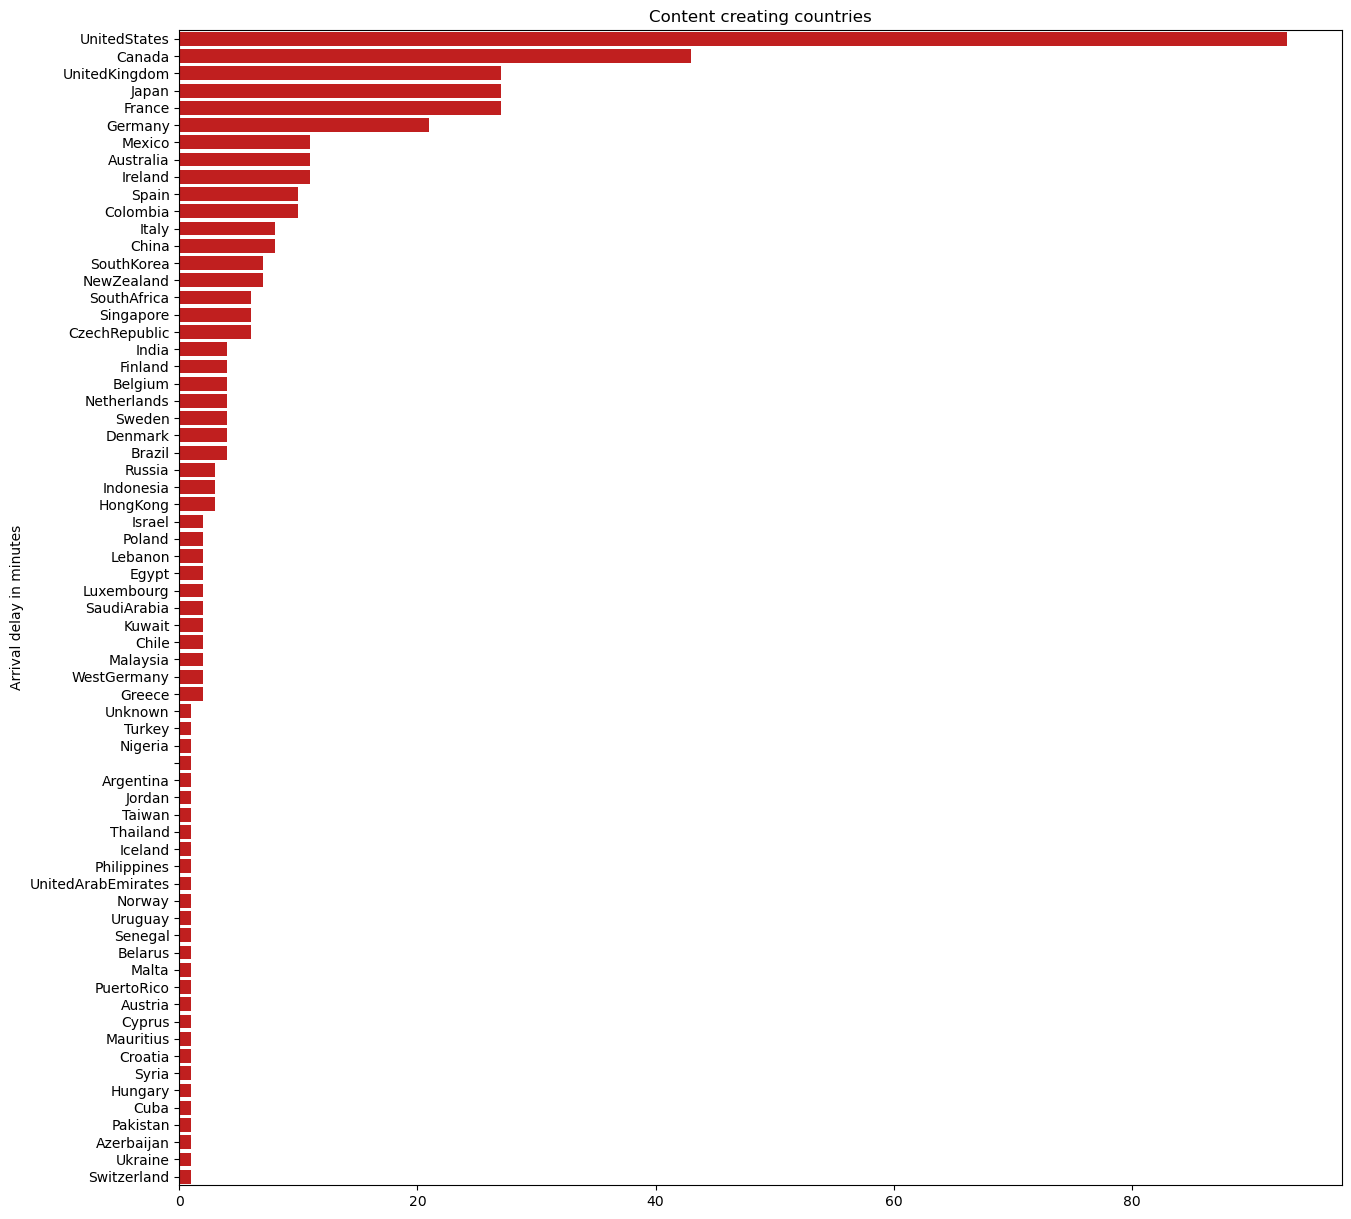

In [44]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()), color='#DB0404')

# Add label for vertical axis
plt.ylabel("Arrival delay in minutes")
plt.show()

# Genre Analysis

In [37]:
from collections import Counter
genres = list(net_movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',''))
ge = Counter(gen)

In [38]:
print(ge)

Counter({'InternationalMovies': 2752, 'Dramas': 2427, 'Comedies': 1674, 'Documentaries': 869, 'Action&Adventure': 859, 'IndependentMovies': 756, 'Children&FamilyMovies': 641, 'RomanticMovies': 616, 'Thrillers': 577, 'Music&Musicals': 375, 'HorrorMovies': 357, 'Stand-UpComedy': 343, 'Sci-Fi&Fantasy': 243, 'SportsMovies': 219, 'ClassicMovies': 116, 'LGBTQMovies': 102, 'AnimeFeatures': 71, 'CultMovies': 71, 'Faith&Spirituality': 65, 'Movies': 54})


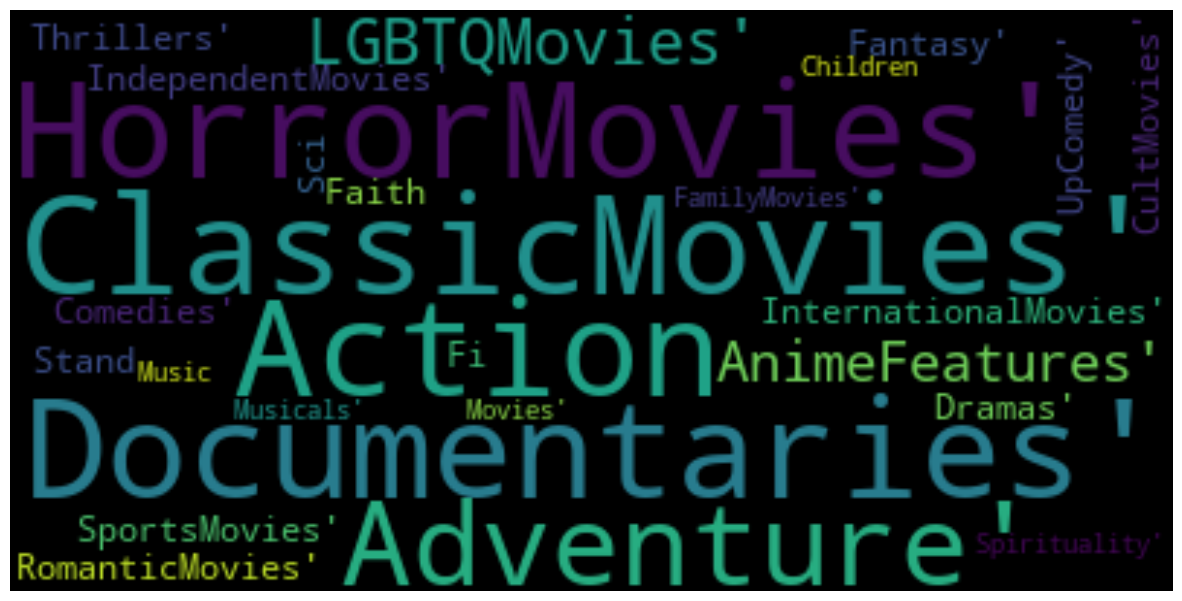

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

txt = list(set(gen))
plt.rcParams['figure.figsize'] = (15,15)
#assigning shape to the word cloud
#mask = np.array(Image.open('../input/wordcloud-img/myv2s3ef.png'))
wordcloud = WordCloud(max_words = 1000000, background_color = 'black').generate(str(txt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
print(str(txt))

['ClassicMovies', 'Documentaries', 'HorrorMovies', 'Action&Adventure', 'LGBTQMovies', 'AnimeFeatures', 'InternationalMovies', 'Thrillers', 'SportsMovies', 'RomanticMovies', 'Dramas', 'Stand-UpComedy', 'IndependentMovies', 'Comedies', 'Sci-Fi&Fantasy', 'CultMovies', 'Faith&Spirituality', 'Movies', 'Children&FamilyMovies', 'Music&Musicals']


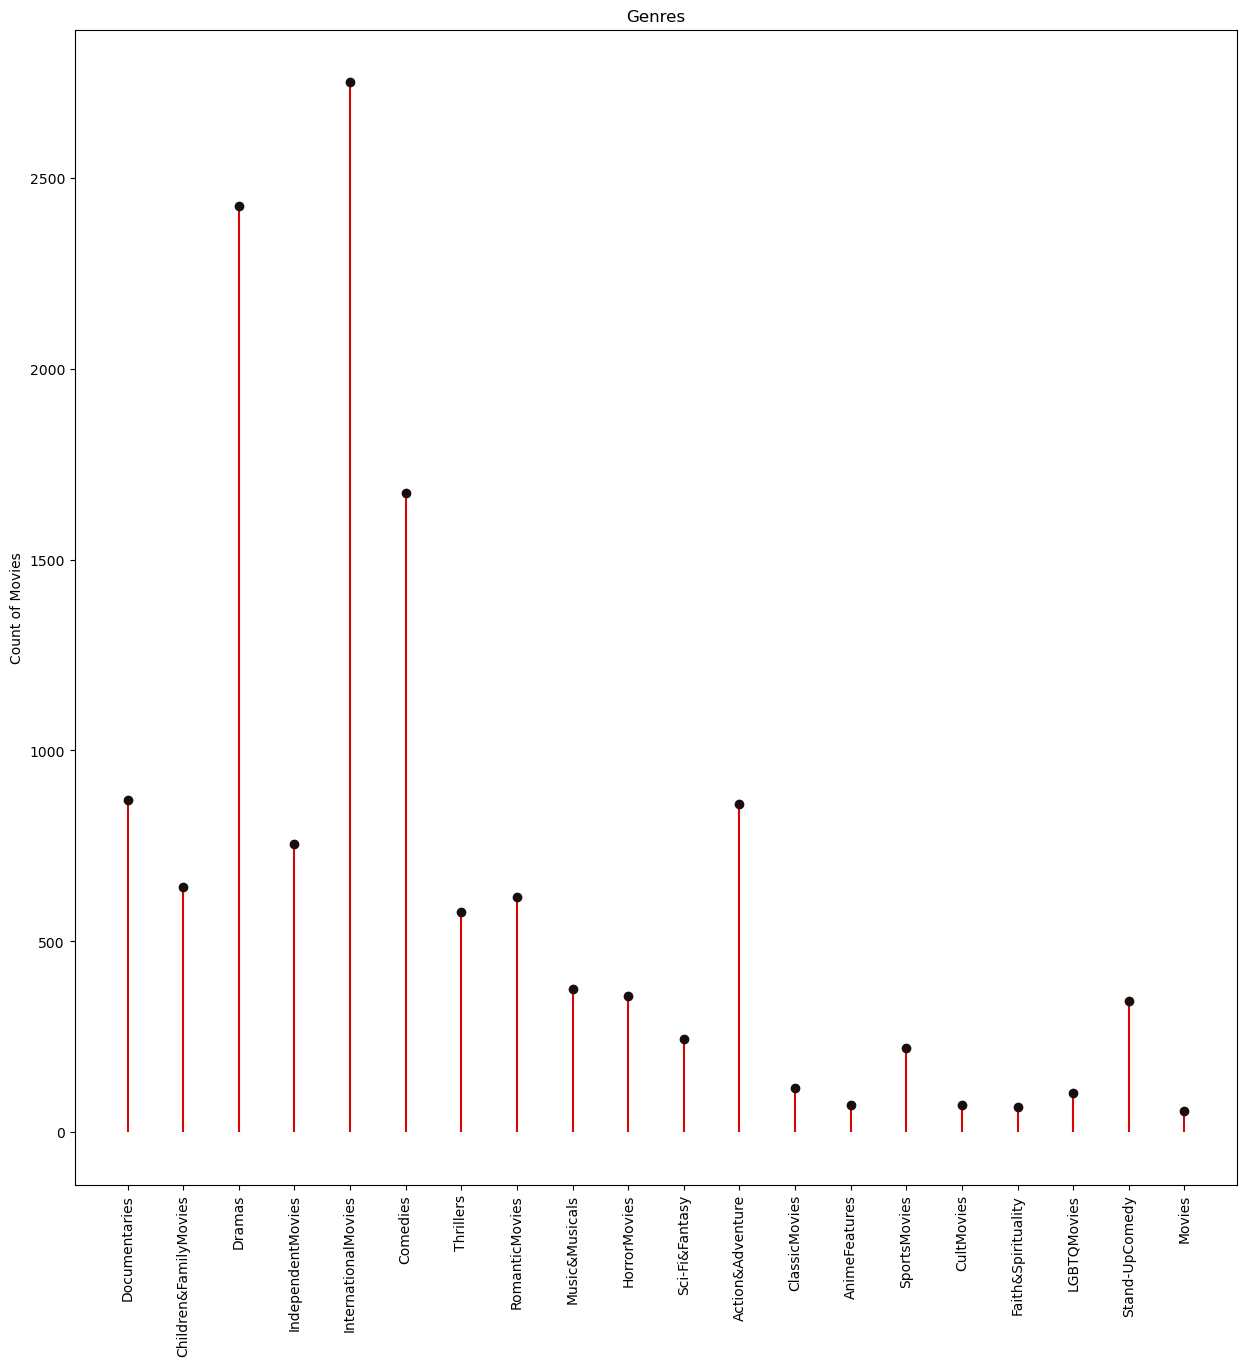

<Figure size 1000x1000 with 0 Axes>

In [41]:
c = {k: v for k, v in sorted(ge.items(), key=lambda item:item[1], reverse=True )}

fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,10))
x = list(ge.keys())
y = list(ge.values())
ax.vlines(x, ymin = 0, ymax = y, color = '#DB0404')
ax.plot(x,y, 'o', color='#1A0D0D')
ax.set_xticklabels(x, rotation=90)
ax.set_ylabel('Count of Movies')
ax.set_title('Genres')
plt.show()

# Duration Analysis

In [34]:
net_movies.dropna(axis=0, inplace=True, subset=['duration'])

In [35]:
net_movies['duration']=net_movies['duration'].str.replace(' min','')
net_movies['duration']=net_movies['duration'].astype(str).astype(int)

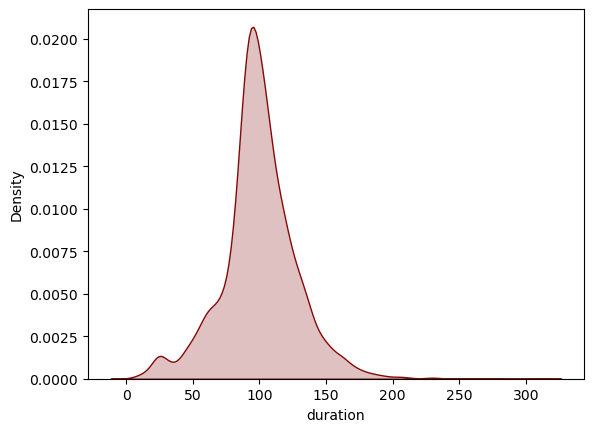

In [36]:
# ploting duration
sns.kdeplot(data=net_movies['duration'], color='#830908', shade=True)
plt.show()

In [45]:
feature = ['title','duration']
durations = net_shows[feature]
durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)

In [46]:
n = ['title','no_of_seasons']
top = durations[n]

top=top.sort_values(by='no_of_seasons',ascending=False)

<Figure size 1000x1000 with 0 Axes>

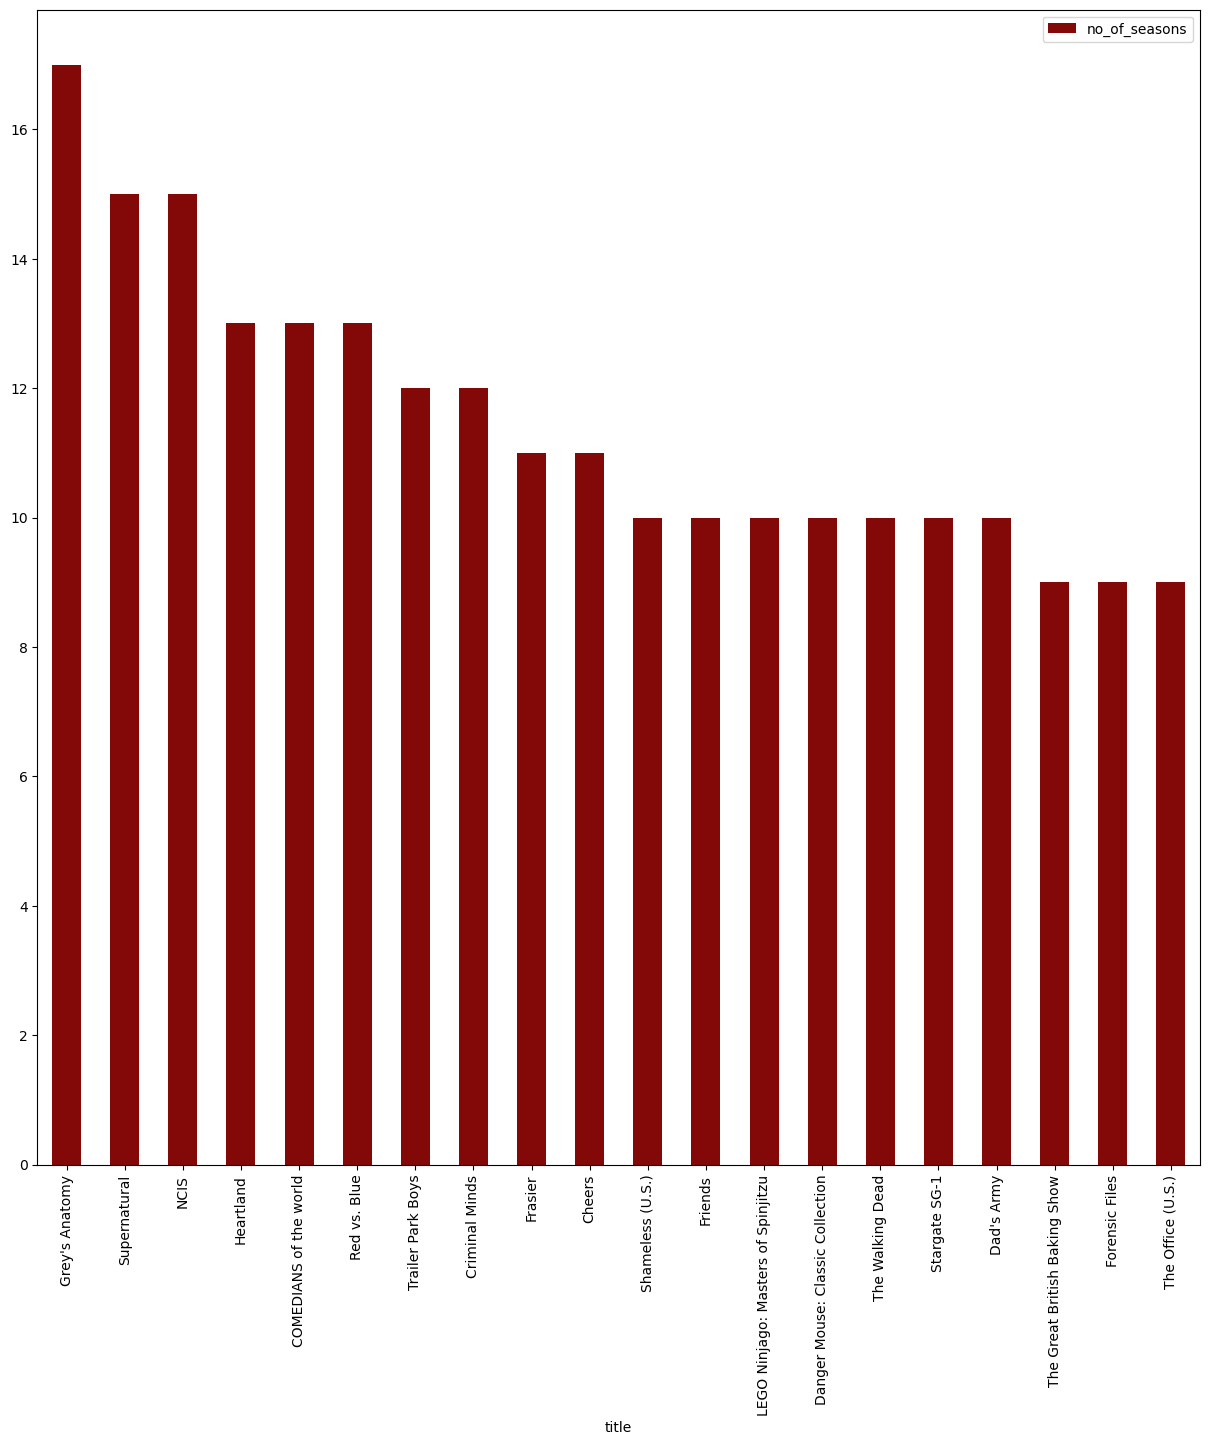

In [47]:
plt.figure(figsize=(10,10))
top20 = top[0:20]
top20.plot(kind='bar', x='title', y='no_of_seasons', color='#830908')
plt.show()